In [1]:
#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np
import random as rnd
import scipy.stats as stats
import sys

In [2]:
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
#Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# Import Lasso
from sklearn.linear_model import Lasso
#Import Ridge
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix, classification_report

# Acquiring and Merging Data

In [4]:
train=pd.read_csv("C:\\Users\\owner\\Documents\\Capstone Project-2\\train.csv")
test=pd.read_csv("C:\\Users\\owner\\Documents\\Capstone Project-2\\test_Comb.csv")
submission=pd.read_csv("C:\\Users\\owner\\Documents\\Capstone Project-2\\SS.csv")

In [5]:
# Saving id variables to create final submission
ids_test = test['User_ID'].copy()
product_ids_test = test['Product_ID'].copy()

In [6]:
# Reducing boundaries to decrease RMSE
cutoff_purchase = np.percentile(train['Purchase'], 95)  # 95 percentile
train.ix[train['Purchase'] > cutoff_purchase, 'Purchase'] = cutoff_purchase

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [7]:
cutoff_purchase

19336.0

In [8]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0


In [9]:
# Label Encoding User_IDs
le = LabelEncoder()
train['User_ID'] = le.fit_transform(train['User_ID'])
test['User_ID'] = le.transform(test['User_ID'])

In [10]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,2,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,3,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,3,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,3,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,4,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0


Since,there are too many User ID and it is causing a lot of memory consumption,I will group the User ID's in numerical ranges.

In [11]:
train['User_ID']=np.where((train['User_ID']>=0) & (train['User_ID']<=1000),500,
                np.where((train['User_ID']>=1000) & (train['User_ID']<=2000),1500,
                np.where((train['User_ID']>=2000) & (train['User_ID']<=3000),2500,
                np.where((train['User_ID']>=3000) & (train['User_ID']<=4000),3500,
                np.where((train['User_ID']>=4000) & (train['User_ID']<=5000),4500,
                np.where((train['User_ID']>=5000) & (train['User_ID']<=6000),5500,999))))))

In [12]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,500,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,500,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,500,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,500,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,500,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,500,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,500,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,500,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,500,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,500,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0


In [13]:
train.User_ID.unique()

array([ 500, 1500, 2500, 3500, 4500, 5500], dtype=int64)

In [14]:
# Label Encoding Product_IDs
new_product_ids = list(set(pd.unique(test['Product_ID'])) - set(pd.unique(train['Product_ID'])))

le = LabelEncoder()
train['Product_ID'] = le.fit_transform(train['Product_ID'])
test.ix[test['Product_ID'].isin(new_product_ids), 'Product_ID'] = -1
new_product_ids.append(-1)

test.ix[~test['Product_ID'].isin(new_product_ids), 'Product_ID'] = le.transform(test.ix[~test['Product_ID'].isin(new_product_ids), 'Product_ID'])

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [15]:
train.Product_ID

0          672
1         2376
2          852
3          828
4         2734
5         1831
6         1745
7         3320
8         3604
9         2631
10        2398
11         140
12         307
13        1355
14        2203
15        1798
16        3598
17         573
18         362
19        2382
20        2096
21        1469
22        2029
23        2036
24        2909
25        1264
26         391
27        1517
28         765
29         833
          ... 
550038    3568
550039    3566
550040    3565
550041    3566
550042    3566
550043    3560
550044    3565
550045    3566
550046    3568
550047    3567
550048    3566
550049    3568
550050    3566
550051    3568
550052    3568
550053    3566
550054    3560
550055    3567
550056    3568
550057    3565
550058    3567
550059    3565
550060    3566
550061    3567
550062    3567
550063    3567
550064    3568
550065    3568
550066    3568
550067    3566
Name: Product_ID, Length: 550068, dtype: int64

In [16]:
train['Product_ID']=np.where((train['Product_ID']>=0) & (train['Product_ID']<=1000),500,
                np.where((train['Product_ID']>=1000) & (train['Product_ID']<=2000),1500,
                np.where((train['Product_ID']>=2000) & (train['Product_ID']<=3000),2500,
                np.where((train['Product_ID']>=3000) & (train['Product_ID']<=4000),3500,
                np.where((train['Product_ID']>=4000) & (train['Product_ID']<=5000),4500,
                np.where((train['Product_ID']>=5000) & (train['Product_ID']<=6000),5500,999))))))

In [17]:
train.Stay_In_Current_City_Years.replace('4+','4',inplace=True)
train['Stay_Years']=pd.to_numeric(train['Stay_In_Current_City_Years'])
train.drop('Stay_In_Current_City_Years',axis=1,inplace=True)
train.sort_values('Stay_Years')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_Years
275033,500,500,F,36-45,7,C,0,5,14.0,NaN,5311.0,0
233218,5500,1500,M,26-35,15,A,0,1,2.0,8.0,8128.0,0
482522,2500,1500,M,18-25,10,A,0,1,2.0,15.0,12048.0,0
482523,2500,2500,M,18-25,10,A,0,5,11.0,NaN,7095.0,0
482524,2500,1500,M,18-25,10,A,0,5,17.0,NaN,5155.0,0
482525,2500,500,M,18-25,10,A,0,1,2.0,15.0,19336.0,0
482526,2500,2500,M,18-25,10,A,0,8,13.0,NaN,9797.0,0
482527,2500,1500,M,18-25,10,A,0,15,16.0,NaN,19336.0,0
482528,2500,500,M,46-50,12,C,1,4,8.0,9.0,2827.0,0
482529,2500,2500,M,46-50,12,C,1,1,15.0,16.0,15882.0,0


Let's find out how much missing values does each column have as a percentile representation.

In [18]:
train_nan=(train.isnull().sum()/train.shape[0])*100
train_nan[train_nan>0]

Product_Category_2    31.566643
Product_Category_3    69.672659
dtype: float64

In [19]:
target=train['Purchase']

I choose to drop the Product_Category_2 and Product_Category_3 since they are hierarchical variable.Their feature should all be included in Product_Category_1 and also there are almost 70% missing values in these two categories.

In [20]:
train.drop(['Purchase','Product_Category_2','Product_Category_3'],axis=1,inplace=True)

In [21]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Stay_Years
0,500,500,F,0-17,10,A,0,3,2
1,500,2500,F,0-17,10,A,0,1,2
2,500,500,F,0-17,10,A,0,12,2
3,500,500,F,0-17,10,A,0,12,2
4,500,2500,M,55+,16,C,0,8,4
5,500,1500,M,26-35,15,A,0,1,3
6,500,1500,M,46-50,7,B,1,1,2
7,500,3500,M,46-50,7,B,1,1,2
8,500,3500,M,46-50,7,B,1,1,2
9,500,2500,M,26-35,20,A,1,8,1


In [22]:
test

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Comb
0,0,3,1196,M,46-50,7,B,2,0,1,11.0,NaN,1000004P00128942
1,1,8,1043,M,26-35,17,C,0,0,3,5.0,NaN,1000009P00113442
2,2,9,2764,F,36-45,1,B,4+,0,5,14.0,NaN,1000010P00288442
3,3,9,1358,F,36-45,1,B,4+,0,4,9.0,NaN,1000010P00145342
4,4,10,529,F,26-35,1,C,1,0,4,5.0,12.0,1000011P00053842
5,5,12,3363,M,46-50,1,C,3,0,2,3.0,15.0,1000013P00350442
6,6,12,1459,M,46-50,1,C,3,0,1,11.0,15.0,1000013P00155442
7,7,12,3577,M,46-50,1,C,3,0,2,4.0,9.0,1000013P0094542
8,8,14,1521,M,26-35,7,A,1,0,10,13.0,16.0,1000015P00161842
9,9,21,661,M,18-25,15,A,4+,0,5,14.0,NaN,1000022P00067942


In [23]:
test.drop(['Comb','Product_Category_2','Product_Category_3','Unnamed: 0'],axis=1,inplace=True)

Let's convert the Gender to binary features where the Male has value 1 and Female has value to be 0.

In [24]:
train['Gender']=train['Gender'].map({'M':1,'F':0})

In [25]:
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Stay_Years
0,500,500,0,0-17,10,A,0,3,2
1,500,2500,0,0-17,10,A,0,1,2
2,500,500,0,0-17,10,A,0,12,2
3,500,500,0,0-17,10,A,0,12,2
4,500,2500,1,55+,16,C,0,8,4


In [26]:
city_dummies=pd.get_dummies(train.City_Category,prefix='City_Category')
city_dummies

,City_Category_A,City_Category_B,City_Category_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
5,1,0,0
6,0,1,0
7,0,1,0
8,0,1,0
9,1,0,0


In [27]:
train=pd.concat([train,city_dummies],axis=1)
train.drop('City_Category',axis=1,inplace=True)

In [28]:
train.Age.replace('55+','55',inplace=True)

In [29]:
train=pd.get_dummies(train,columns=['Age','Occupation','Product_Category_1','Product_ID','User_ID','Stay_Years'],drop_first=True)

In [30]:
train.head(5)

,Gender,Marital_Status,City_Category_A,City_Category_B,City_Category_C,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Product_ID_3500,User_ID_1500,User_ID_2500,User_ID_3500,User_ID_4500,User_ID_5500,Stay_Years_1,Stay_Years_2,Stay_Years_3,Stay_Years_4
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
test['Product_ID']=np.where((test['Product_ID']>=0) & (test['Product_ID']<=1000),500,
                np.where((test['Product_ID']>=1000) & (test['Product_ID']<=2000),1500,
                np.where((test['Product_ID']>=2000) & (test['Product_ID']<=3000),2500,
                np.where((test['Product_ID']>=3000) & (test['Product_ID']<=4000),3500,
                np.where((test['Product_ID']>=4000) & (test['Product_ID']<=5000),4500,
                np.where((test['Product_ID']>=5000) & (test['Product_ID']<=6000),5500,999))))))

In [32]:
test.Stay_In_Current_City_Years.replace('4+','4',inplace=True)
test['Stay_Years']=pd.to_numeric(test['Stay_In_Current_City_Years'])
test.drop('Stay_In_Current_City_Years',axis=1,inplace=True)
test.sort_values('Stay_Years')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Stay_Years
66334,178,500,M,18-25,4,C,0,8,0
38080,4429,500,M,26-35,2,A,0,16,0
38081,4429,2500,M,26-35,2,A,0,11,0
38082,4429,2500,M,26-35,2,A,0,16,0
38083,4430,1500,M,55+,1,A,0,1,0
204617,3509,2500,M,36-45,17,C,0,1,0
98785,2013,1500,F,36-45,6,A,0,8,0
38092,4453,500,M,18-25,4,A,0,1,0
204614,3503,500,F,36-45,3,B,0,4,0
204613,3503,1500,F,36-45,3,B,0,5,0


In [33]:
test['User_ID']=np.where((test['User_ID']>=0) & (test['User_ID']<=1000),500,
                np.where((test['User_ID']>=1000) & (test['User_ID']<=2000),1500,
                np.where((test['User_ID']>=2000) & (test['User_ID']<=3000),2500,
                np.where((test['User_ID']>=3000) & (test['User_ID']<=4000),3500,
                np.where((test['User_ID']>=4000) & (test['User_ID']<=5000),4500,
                np.where((test['User_ID']>=5000) & (test['User_ID']<=6000),5500,999))))))

In [34]:
city_dummies=pd.get_dummies(test.City_Category,prefix='City_Category')
city_dummies

,City_Category_A,City_Category_B,City_Category_C
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,1,0,0
9,1,0,0


In [35]:
test=pd.concat([test,city_dummies],axis=1)
test.drop('City_Category',axis=1,inplace=True)

In [36]:
test.Age.replace('55+','55',inplace=True)

In [37]:
test=pd.get_dummies(test,columns=['Age','Occupation','Product_Category_1','Product_ID','User_ID','Stay_Years'],drop_first=True)

In [38]:
test['Gender']=test['Gender'].map({'M':1,'F':0})

In [39]:
test

,Gender,Marital_Status,City_Category_A,City_Category_B,City_Category_C,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Product_ID_3500,User_ID_1500,User_ID_2500,User_ID_3500,User_ID_4500,User_ID_5500,Stay_Years_1,Stay_Years_2,Stay_Years_3,Stay_Years_4
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
6,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
8,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
params = {}
params["min_child_weight"] = 10
params["subsample"] = 0.7
params["colsample_bytree"] = 0.7
params["scale_pos_weight"] = 0.8
params["silent"] = 0
params["max_depth"] = 6
params["nthread"] = 6
params["objective"] = "reg:linear"
params["eta"] = 0.1
params["base_score"] = 1800
params["eval_metric"] = "rmse"
params["seed"] = 0

plst = list(params.items())
num_rounds = 3000

In [41]:
xgtrain = xgb.DMatrix(train[:], label=target,missing=np.nan)
watchlist = [(xgtrain, 'train')]
model_1_xgboost = xgb.train(plst, xgtrain, num_rounds)

In [48]:
seeds = [1122, 2244, 3366, 4488, 5500]
test_preds = np.zeros((len(test), len(seeds)))

for run in range(len(seeds)):
    sys.stdout.write("\rXGB RUN:{}/{}".format(run+1, len(seeds)))
    sys.stdout.flush()
    params['seed'] = seeds[run]
    clf = xgb.train(plst, xgtrain, num_rounds)
    
    #bst = xgb.train(param, dtrain, num_round)
    # predict is not working without this code
    clf.save_model('001.model')
    clf = xgb.Booster(param)
    clf.load_model('001.model')

    #preds = clf.predict(dtest)
    
    dtest = xgb.DMatrix(test.values, missing=np.nan)
    preds = clf.predict(dtest)
    test_preds[:, run] = clf.predict(dtest)
    
test_preds = np.mean(test_preds, axis=1)

XGB RUN:1/5

NameError: name 'param' is not defined

In [43]:
# Submission file
submit = pd.DataFrame({'User_ID': ids_test, 'Product_ID': product_ids_test, 'Purchase': test_preds})
submit = submit[['User_ID', 'Product_ID', 'Purchase']]

submit.ix[submit['Purchase'] < 0, 'Purchase'] = 12  # changing min prediction to min value in train
submit.to_csv("final_solution.csv", index=False)

Exception: Data must be 1-dimensional

In [ ]:
#df=pd.concat([train,test],ignore_index=True)
#df.head(5)

In [ ]:
#df.info()

In [ ]:
#df_nan = (df.isnull().sum() / df.shape[0]) * 100
#df_nan[df_nan > 0]

Let's handle the missing values by one by one columns and features.Since,Comb is nothing but the combination of Product and User ID,let's drop it from the original dataframe for the sake of making a simpler dataframe.

In [ ]:
#df.drop('Comb',axis=1,inplace=True)
#df.head(5)

Since,not sure about the Unnamed:0 what it does,therefore decided to drop this column as well.

In [ ]:
#df.drop('Unnamed: 0',axis=1,inplace=True)
#df.head(5)

# Now,let's do some feature engineering.

In [ ]:
#df.Stay_In_Current_City_Years.replace('4+','4',inplace=True)
#df['Stay_Years']=pd.to_numeric(df['Stay_In_Current_City_Years'])
#df.drop('Stay_In_Current_City_Years',axis=1,inplace=True)
#df.sort_values('Stay_Years')

In [ ]:
#df['Gender']=df['Gender'].map({'M':1,'F':0})

In [ ]:
#df.head(2)

In [ ]:
#city_dummies=pd.get_dummies(df.City_Category,prefix='City_Category')
#city_dummies

In [ ]:
#df=pd.concat([df,city_dummies],axis=1)

In [ ]:
#df.drop('City_Category',axis=1,inplace=True)

In [ ]:
#df.head(10)

In [46]:
set(test.User_ID.unique()).issubset(set(train.User_ID.unique()))

AttributeError: 'DataFrame' object has no attribute 'User_ID'

In [ ]:
set(test.Product_ID.unique()).issubset(set(train.Product_ID.unique()))

In [ ]:
#df.Age.replace('55+','55',inplace=True)

In [ ]:
#df['Age'] = df.Age.apply(lambda x: np.array(x.split('-'), dtype=int).mean())

In [ ]:
#df['Product_Category_2']=df['Product_Category_2'].astype(str)
#df.Product_Category_2.replace('NaN',999,inplace=True)
#df.Product_Category_3.replace('NaN',999,inplace=True)

In [ ]:
#df=pd.get_dummies(df,columns=['Age'],drop_first=True)

In [ ]:
#df=pd.get_dummies(df,columns=['Occupation'],drop_first=True)

In [ ]:
#df=pd.get_dummies(df,columns=['Product_Category_1'],drop_first=True)

In [ ]:
#df=pd.get_dummies(df,columns=['Product_ID'],drop_first=True)

In [ ]:
#df=pd.get_dummies(df,columns=['Stay_Years'],drop_first=True)

In [ ]:
#df.head(10)

In [ ]:
#filename = 'featureFile.csv'
#df.to_csv(filename, index=False, encoding='utf-8')

In [ ]:
#y=df['Purchase']

In [ ]:
#df.drop('Purchase',axis=1,inplace=True)

In [ ]:
#df=pd.get_dummies(df,columns=['User_ID'],drop_first=True)

In [ ]:
#df=pd.get_dummies(df,columns=['Age','Occupation','Product_Category_1','City_Category','Gender','Product_ID','User_ID','Stay_Years'],drop_first=True)

In [ ]:
#df=df.Age.replace(['0-17','18-25','26-35','36-45','46-50','51-55','55+'],['15','21','30','40','48','53','60'],inplace=True)

In [ ]:
#df.head(2)

In [ ]:
#X=df.loc[:,'Gender':'Stay_Years_4']

In [44]:
lreg=LinearRegression()

In [49]:
test.head(5)

,Gender,Marital_Status,City_Category_A,City_Category_B,City_Category_C,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Product_ID_3500,User_ID_1500,User_ID_2500,User_ID_3500,User_ID_4500,User_ID_5500,Stay_Years_1,Stay_Years_2,Stay_Years_3,Stay_Years_4
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#X_train,y_train,X_test,y_test=train_test_split(X,y)

In [ ]:
lreg.fit(X[:, None], y)

In [45]:
lreg.fit(train,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
target_pred=lreg.predict(train)

In [56]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(lreg.score(train,target)))
mse=mean_squared_error(target,target_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6419170548456319
Root Mean Squared Error: 2943.345579057299


In [58]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lreg,train,target,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.63123005  0.63267212  0.6337285   0.63343074  0.25282678]
Average 5-Fold CV Score: 0.5567776386173791


In [59]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(lreg,train,target,cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(lreg,train,target,cv=10)
print(np.mean(cvscores_10))


-129.999263329
-4.37656910814


In [61]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize=True)

# Fit the regressor to the data
lasso.fit(train,target)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)


[    0.             0.            -0.            -0.             0.            -0.
    -0.             0.             0.             0.             0.            -0.
    -0.             0.            -0.            -0.             0.             0.
    -0.            -0.            -0.             0.             0.             0.
     0.             0.             0.             0.            -0.            -0.
    -0.            -0.          -465.3485117  -7743.54958282 -5358.52799164
  1950.71520901   235.84881837 -4001.68255743     0.          2688.91868602
 -6015.51096995 -7240.62589457 -8419.93262486     0.             0.
   241.30831149    -0.         -5183.48492347 -6556.56088771 -7363.56273639
     0.            -0.            -0.            -0.             0.            -0.
     0.             0.            -0.             0.            -0.             0.        ]


In [64]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

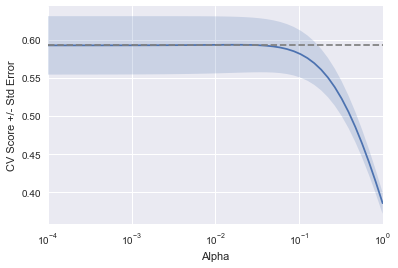

In [65]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,train,target,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree,param_dist, cv=5)

# Fit it to the data
tree_cv.fit(train,target)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [68]:
# Generate the confusion matrix and classification report
print(confusion_matrix(target,target_pred))
print(classification_report(target,target_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets